In [1]:
import pandas as pd

### recommendations that counts the number of upvotes a comment has received

In [2]:
comments = pd.read_csv('./data/comments.csv')

## Sentiment analysis

In [4]:
from textblob import TextBlob

In [5]:
comments['sentiment'] = comments.commentBody.map(lambda text: TextBlob(text).sentiment.polarity)

In [6]:
print("5 random comments with highest positive sentiment polarity: \n")
cL = comments.loc[comments.sentiment==1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with highest positive sentiment polarity: 

How about putting government in charge of everything?  Brilliant!

Diane Feinstein and Christopher Steele and Glenn Simpson- you did a great job digging into the truth about Russia and Trump!

Because in times of stagnation and rising inequality it is always best to cut wages.

Some things are best kept out of the hands of businesses and run by government agencies. This is a prime example. Healthcare might be one, too, as well as the office of the President.

Thank you both for your service to the USA. Now please rally our great troops to vote against their “Commander” in Chief and his Republican sycophants in November!



In [7]:
print("5 random comments with most negative sentiment polarity: \n")
cL = comments.loc[comments.sentiment==-1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with most negative sentiment polarity: 

Sometimes the sanest reaction to an insane situation is Insanity..<br/>Our "President" is.....Himself....Borderline.

Trump just doesn’t care about Latin America. His disdain to our region is insulting but understandable for a man of his profile and background.

This is boring, I'm going to Breitbart to read the comments on this. That's entertainment!

Bravo!  No woman should depend on any man for anything. It is dangerous!  <br/><br/>I’m for you Jessica.  I say you go woman!  Crush the competition and amaze your enemies!  And THEN REMIND THEM THAT YOU DID!  

There is no doubt. This man is evil. 



In [8]:
print("5 random comments with most neutral (zero) sentiment polarity:\n ")
cL = comments.loc[comments.sentiment==0, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with most neutral (zero) sentiment polarity:
 
"Anthony, who is of Venezuelan descent. . . Instead of running for cover, Anthony blocked the door to keep the shooter out. He held his ground even as the attacker opened fire." words to ponder when considering limiting immigration into this country.

If voters are to change Gerrymandering we first have to change Citizens United. Until we get past one vote per person vs all the votes money can buy justice for voters will just keep spinning it`s wheels.

Why did Congress refuse to allow Obama to strike Syria? Why didn't Trump seek Congress's approval before launching these strikes?

So, I guess we will start hearing plans to arm Waffle House employees.

No mention of Xavier University?



In [9]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(comments.sentiment);
plt.title("Distribution of sentiment polarity of comments");

C:\Users\hyh6hhy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Illustration: Most comment have polarities close to zero.

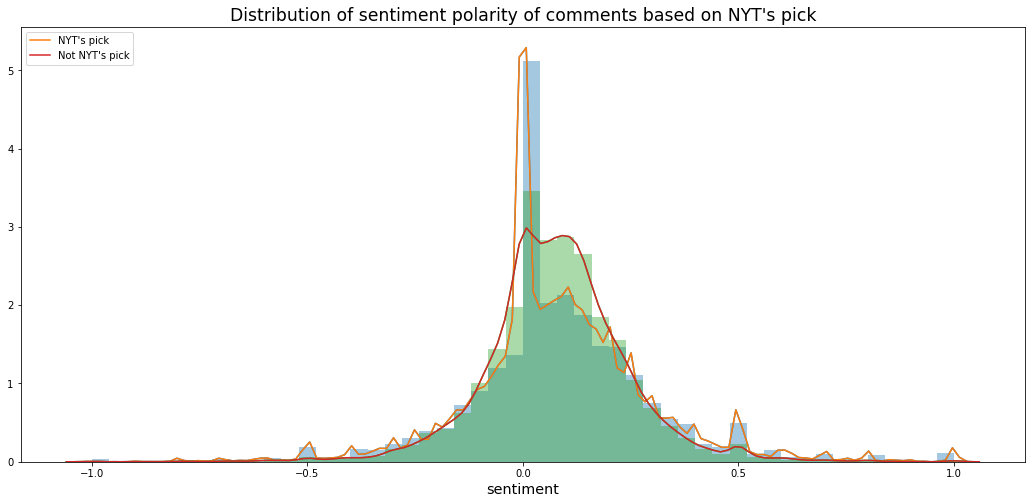

In [10]:
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(comments.loc[comments.editorsSelection==0, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.editorsSelection==0, 'sentiment'], ax=ax, label = "NYT's pick");
sns.distplot(comments.loc[comments.editorsSelection==1, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.editorsSelection==1, 'sentiment'], ax=ax, label = "Not NYT's pick");
plt.title("Distribution of sentiment polarity of comments based on NYT's pick");
ax.legend(loc='upper left');

### Distribution of sentiment polarity for comments that are not NYT's pick is close to normal whereas for comments that are NYT's pick, the distribution has a spike at zero sentiment polarity. This indicates editors have higher preference for neutral comments.

## Analysis for recommendation and comments

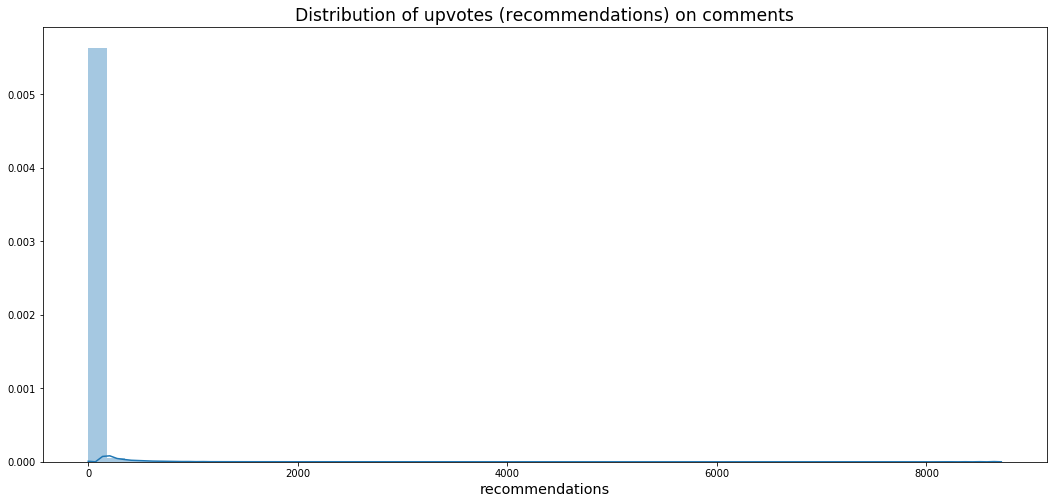

In [11]:
sns.distplot(comments.recommendations);
plt.title("Distribution of upvotes (recommendations) on comments");

### The following graph shows that the distribution of upvotes on the comments is highly skewed to the right. So, the mean of the number upvotes on comments is significantly higher than the median.

In [12]:
comments.recommendations.quantile(0.99), comments.recommendations.quantile(0.90)

(299.0, 28.0)

### 99% of comments have 283 or fewer upvotes and 95% of comments have 58 or fewer upvotes.

In [ ]:
##

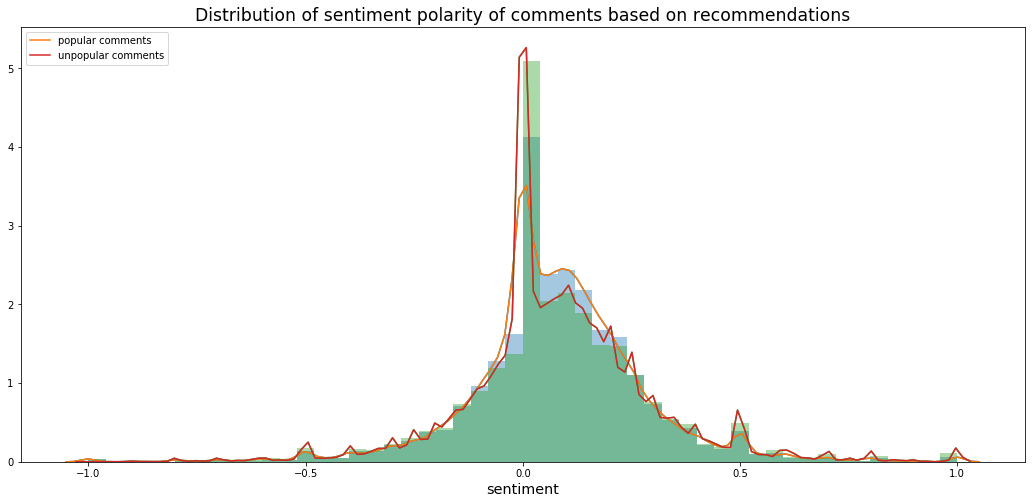

In [13]:
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(comments.loc[comments.recommendations>50, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.recommendations>50, 'sentiment'], ax=ax, label = "popular comments");
sns.distplot(comments.loc[comments.editorsSelection<3, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.editorsSelection<3, 'sentiment'], ax=ax, label = "unpopular comments");
plt.title("Distribution of sentiment polarity of comments based on recommendations");
ax.legend(loc='upper left');

## The number of upvotes on the comments selected as Editor's pick are significantly higher on average with a mean close to 230 upvotes:

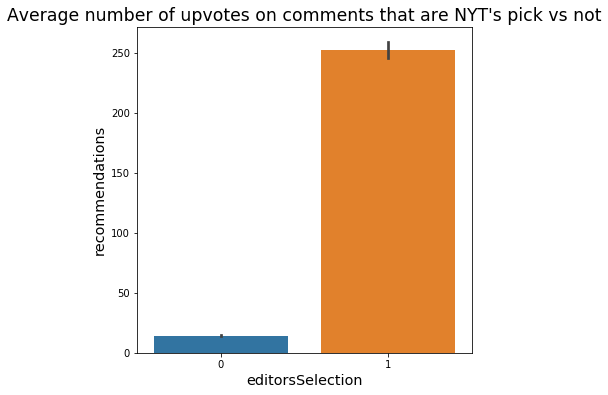

In [14]:
mpl.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x='editorsSelection', y='recommendations', data=comments);
plt.title("Average number of upvotes on comments that are NYT's pick vs not");

## Even though the comments that are selected as Editor's picks have more upvotes more on average, the distribution of upvotes is still highly skewed to the right.

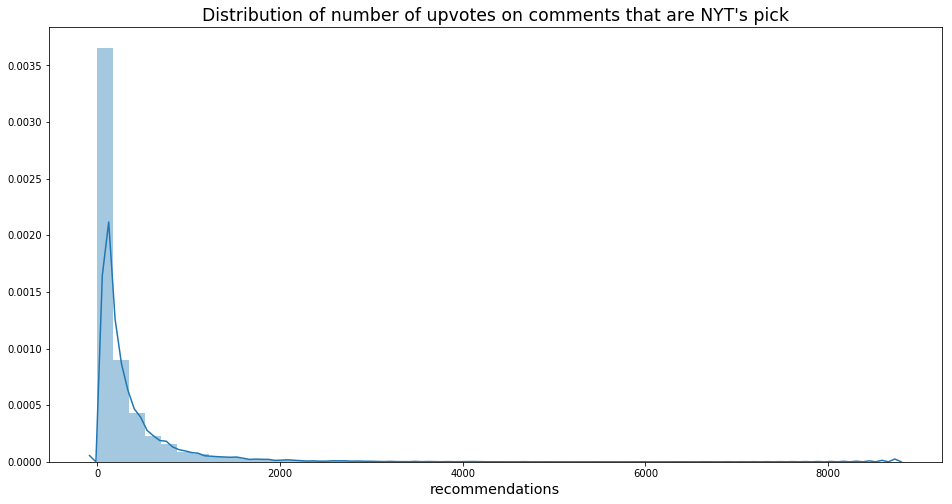

In [15]:
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(comments.loc[comments.editorsSelection==1, 'recommendations']);
plt.title("Distribution of number of upvotes on comments that are NYT's pick");

### There are three types of comments - usual comments, replies made to other comments/replies and reporter's replies to a comment/reply.